In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

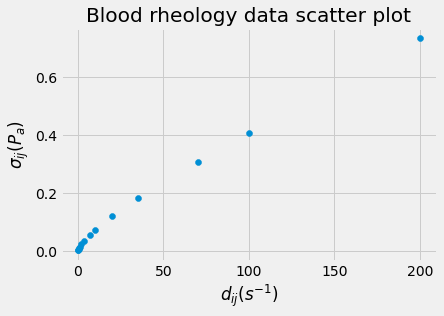

In [12]:
df = pd.read_csv('dataset.csv')
df.drop(columns=['Viscosity'], inplace=True)

# dataset scatter plot
with plt.style.context('fivethirtyeight'):
    plt.scatter(df.ShearRate, df.Stress)
    plt.xlabel(r'$d_{ij} (s^{-1})$')
    plt.ylabel(r'$\sigma_{ij} (P_{a})$')
    plt.title('Blood rheology data scatter plot')
    plt.show()

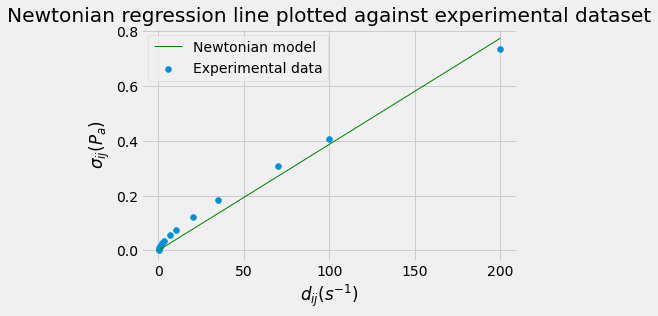

In [21]:
# Newtonian model regression
newtonian_reg = LinearRegression(fit_intercept=False)
newtonian_reg.fit(df[['ShearRate']], df.Stress)
newtonian_coef = newtonian_reg.coef_[0] # linear regression line coeffecient
newtonian_intercept = newtonian_reg.intercept_ # linear regression line intercept; should be 0

def newtonian_line(shear_rates):
    return newtonian_coef * shear_rates + newtonian_intercept

newtonian_line = np.vectorize(newtonian_line)

# Plot Newtonian regression line against the dataset
shear_rates = np.linspace(0, 200, 300)
with plt.style.context('fivethirtyeight'):
    plt.scatter(df.ShearRate, df.Stress, label='Experimental data')
    plt.plot(shear_rates, newtonian_line(shear_rates), label='Newtonian model', color='green', linewidth=1)
    plt.xlabel(r'$d_{ij} (s^{-1})$')
    plt.ylabel(r'$\sigma_{ij} (P_{a})$')
    plt.title('Newtonian regression line plotted against experimental dataset')
    plt.legend()
    plt.show()

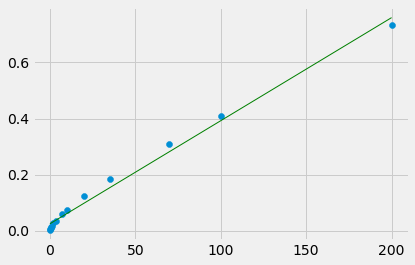

In [25]:
# Bingham model regression
bingham_reg = LinearRegression()
bingham_reg.fit(df[['ShearRate']], df.Stress)
bingham_reg_coef = bingham_reg.coef_[0] # linear regression line coeffecient
bingham_reg_intercept = bingham_reg.intercept_ # linear regression line intercept

def bingham_line(shear_rates):
    return bingham_reg_coef * shear_rates + bingham_reg_intercept

bingham_line = np.vectorize(bingham_line)

# Plot Bingham regression line against the dataset
shear_rates = np.linspace(0, 200, 300)
with plt.style.context('fivethirtyeight'):
    plt.scatter(df.ShearRate, df.Stress, label='Experimental data')
    plt.plot(shear_rates, bingham_line(shear_rates), label='Bingham model', color='green', linewidth=1)
    plt.xlabel(r'$d_{ij} (s^{-1})$')
    plt.ylabel(r'$\sigma_{ij} (P_{a})$')
    plt.title('Newtonian regression line plotted against experimental dataset')
    plt.legend()
    plt.show()